<a href="https://colab.research.google.com/github/Jguaquez/RedNeuronal-para-prediccionde-C-/blob/main/proyecto_para_solo_un_dia_de_prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

empezabos corriendo esta primera linea de codigo donde nos permite subir nuestro archivo excel

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving temp meteorologia.xlsx to temp meteorologia.xlsx


aqui cargamos los datos de nuestra tabla de excel y limpiamos los valores, para que no haya problema al tomar los datos nos deshacemos de las variables no numericas como titulos y ya que nuestra tabla esta organizada por una columna de datos por cada dia sera mas facil ingresar los datos en pasos posteriores (tambien en este bloque eliminamos datos vacios como N/A)

In [ ]:
import pandas as pd

# Lee las hojas del archivo recién subido (nombre exacto debe coincidir)
df_dh = pd.read_excel("temp meteorologia.xlsx", sheet_name="Temp_DH")
df_lp = pd.read_excel("temp meteorologia.xlsx", sheet_name="temperatura_LP")

# Función para limpiar cada valor individual
def clean_temperature(value):
    if isinstance(value, str):
        value = value.replace("°C", "").replace(",", ".").strip()
    try:
        return float(value)
    except:
        return None

# Aplica limpieza a todo el DataFrame
df_dh_clean = df_dh.applymap(clean_temperature)
df_lp_clean = df_lp.applymap(clean_temperature)

# Elimina filas y columnas vacías
df_dh_clean.dropna(axis=0, how='all', inplace=True)
df_dh_clean.dropna(axis=1, how='all', inplace=True)
df_dh_clean.dropna(inplace=True)  # Quita cualquier fila que aún tenga NaNs
df_lp_clean.dropna(axis=0, how='all', inplace=True)
df_lp_clean.dropna(axis=1, how='all', inplace=True)
df_lp_clean.dropna(inplace=True)  # Quita cualquier fila que aún tenga NaNs

# Verifica resultados temperatura dh
print(df_dh_clean.shape)
df_dh_clean.head()




(5, 30)


<ipython-input-16-dbc09458edaa>:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_dh_clean = df_dh.applymap(clean_temperature)
<ipython-input-16-dbc09458edaa>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_lp_clean = df_lp.applymap(clean_temperature)


,2025-04-01,2025-04-02,2025-04-03,2025-04-04,2025-04-05,2025-04-06,2025-04-07,2025-04-08,2025-04-09,2025-04-10,...,2025-04-21,2025-04-22,2025-04-23,2025-04-24,2025-04-25,2025-04-26,2025-04-27,2025-04-28,2025-04-29,2025-04-30
1,19.0,19.0,17.8,20.60,21.4,20.7,22.66,16.01,16.77,18.93,...,19.73,20.31,23.57,21.1,22.36,23.87,22.07,13.06,26.32,21.94
2,19.0,19.0,17.9,20.75,21.4,20.7,22.08,17.69,18.63,20.91,...,22.46,21.23,20.50,21.1,25.40,29.06,26.19,19.27,27.88,27.59
3,19.0,19.0,18.0,20.85,21.5,20.6,22.20,21.88,16.00,17.59,...,23.14,19.01,22.52,21.1,20.88,16.45,16.17,18.79,29.43,28.72
4,19.0,19.0,18.1,20.94,21.5,20.7,20.96,23.51,23.42,16.63,...,19.50,18.35,20.84,21.1,28.22,21.30,19.96,22.78,17.65,26.61
5,19.0,19.0,18.2,21.05,21.5,20.7,20.98,23.52,23.81,23.38,...,18.50,19.81,18.77,21.1,24.80,22.24,18.10,10.86,16.86,20.72


In [ ]:
#verifica resultados temperatura lp
print(df_lp_clean.shape)
df_lp_clean.head()

(5, 29)


,2025-04-01,2025-04-02,2025-04-03,2025-04-04,2025-04-05,2025-04-06,2025-04-07,2025-04-08,2025-04-09,2025-04-10,...,2025-04-20,2025-04-21,2025-04-22,2025-04-23,2025-04-24,2025-04-25,2025-04-26,2025-04-27,2025-04-28,2025-04-29
2,21.5,21.5,20.8,23.4,23.5,23.5,24.02,20.85,14.06,15.57,...,23.5,21.74,22.08,18.37,23.5,23.88,16.30,17.48,10.18,25.13
3,21.5,21.5,20.8,23.5,23.5,23.5,23.69,16.48,17.68,14.21,...,23.5,19.35,24.25,20.20,23.5,19.46,28.09,24.50,6.77,17.26
4,21.5,21.5,20.9,23.6,23.5,23.5,23.86,21.98,21.37,20.20,...,23.5,23.24,20.60,24.56,23.5,22.47,24.26,20.03,19.71,29.05
5,21.5,21.5,20.9,23.6,23.5,23.5,23.75,18.22,22.32,23.53,...,23.5,24.64,24.00,25.49,23.5,27.00,21.85,18.86,16.17,25.58
6,21.5,21.5,21.0,23.7,23.5,23.5,23.58,23.51,21.24,14.10,...,23.5,25.15,25.67,18.38,23.5,27.29,29.99,25.07,15.93,20.23


instalamos una libreria para mejor funciomanieto de la red neuronal

In [ ]:
!pip install tensorflow

 preprocesamiento de datos para la red neuronal
originalmente cada columna es un día y cada fila es una medida cada 10 minutos.

Después de la transposición, cada fila es un día completo y cada columna una medida en el día.

Esto facilita concatenar ambos sensores por día.

Asegura que ambos DataFrames tengan el mismo número de días.

Corta al más largo para emparejarlos.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
df_dh_clean = df_dh_clean.transpose()
df_lp_clean = df_lp_clean.transpose()

# Igualar longitud
min_len = min(len(df_dh_clean), len(df_lp_clean))
df_dh_clean = df_dh_clean.iloc[:min_len]
df_lp_clean = df_lp_clean.iloc[:min_len]

# Concatenar
data = pd.concat([df_dh_clean.reset_index(drop=True), df_lp_clean.reset_index(drop=True)], axis=1)
data.dropna(inplace=True)
print("Data final shape:", data.shape)  # Esperado: (n_samples, n_features)

Data final shape: (29, 10)


se hace la normalizacion de datos y se crean ventanas de netrenamiento para aprender patrones de tiempo

esta red neruronal es una red densa

In [ ]:
# === 4. Normalización ===
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# === 5. Crear ventanas de entrenamiento pequeñas ===
# Crear ventanas
# Aquí usamos ventana de 2 para poder hacer algo con pocos datos
X, y = [], []
timesteps = 2  # ventana corta

for i in range(timesteps, len(data_scaled)):
    X.append(data_scaled[i - timesteps:i])
    y.append(data_scaled[i])

X = np.array(X)
y = np.array(y)

# Aplanar X para red densa
X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

print("X shape:", X.shape)  # (samples, features)
print("y shape:", y.shape)

##Aquí usamos ventana de 2 para poder hacer algo con pocos datos

print("X shape:", X.shape)  # (samples, timesteps, features)
print("y shape:", y.shape)


X shape: (27, 20)
y shape: (27, 10)
X shape: (27, 20)
y shape: (27, 10)


CODIGO BUENO SOLO UN DIA (modelo de la red neuronal para predecir valores de un solo dia)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(y.shape[1])  # número de variables de salida
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


prediccion y muestra de lo0s datos

In [ ]:
# === 6. Predicción (último bloque) ===
last_window = data_scaled[-timesteps:]
last_window_flat = last_window.reshape((1, timesteps * data.shape[1]))
prediction_scaled = model.predict(last_window_flat)

# Inversión de escala
full_data_plus_prediction = np.vstack([data_scaled, prediction_scaled])
data_inverse = scaler.inverse_transform(full_data_plus_prediction)
prediction = data_inverse[-1]

# === 7. Mostrar predicción ===
print("\n🔮 Predicción del siguiente día (todas las variables):")
for i, temp in enumerate(prediction):
    print(f"Variable {i+1}: {temp:.2f} °C")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step

🔮 Predicción del siguiente día (todas las variables):
Variable 1: 21.87 °C
Variable 2: 20.50 °C
Variable 3: 20.44 °C
Variable 4: 18.63 °C
Variable 5: 18.99 °C
Variable 6: 19.75 °C
Variable 7: 23.97 °C
Variable 8: 22.64 °C
Variable 9: 17.96 °C
Variable 10: 21.74 °C


codigo para graficar

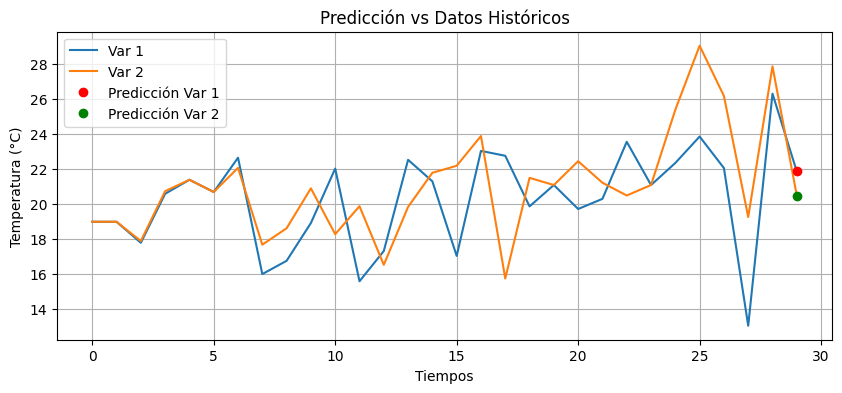

In [ ]:
# (Opcional) Graficar algunas variables
plt.figure(figsize=(10, 4))
plt.plot(data_inverse[:, 0], label='Var 1')
plt.plot(data_inverse[:, 1], label='Var 2')
plt.plot(len(data_inverse)-1, prediction[0], 'ro', label='Predicción Var 1')
plt.plot(len(data_inverse)-1, prediction[1], 'go', label='Predicción Var 2')
plt.legend()
plt.title("Predicción vs Datos Históricos")
plt.xlabel("Tiempos")
plt.ylabel("Temperatura (°C)")
plt.grid()
plt.show()